# Соберём все результаты

In [15]:
import numpy as np
import os
import functions
%pylab
%matplotlib inline
%run ./load_notebook.py

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [16]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [2]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')

### Возникла небольшая проблема


В процессе проверки кода я обнаружила, что в качестве PA=178 у меня 180-178 = 12, а не 2. Я исправила эту ошибку, но не до конца. При исправлении у меня что-то странное произошло с эпициклической частотой. 

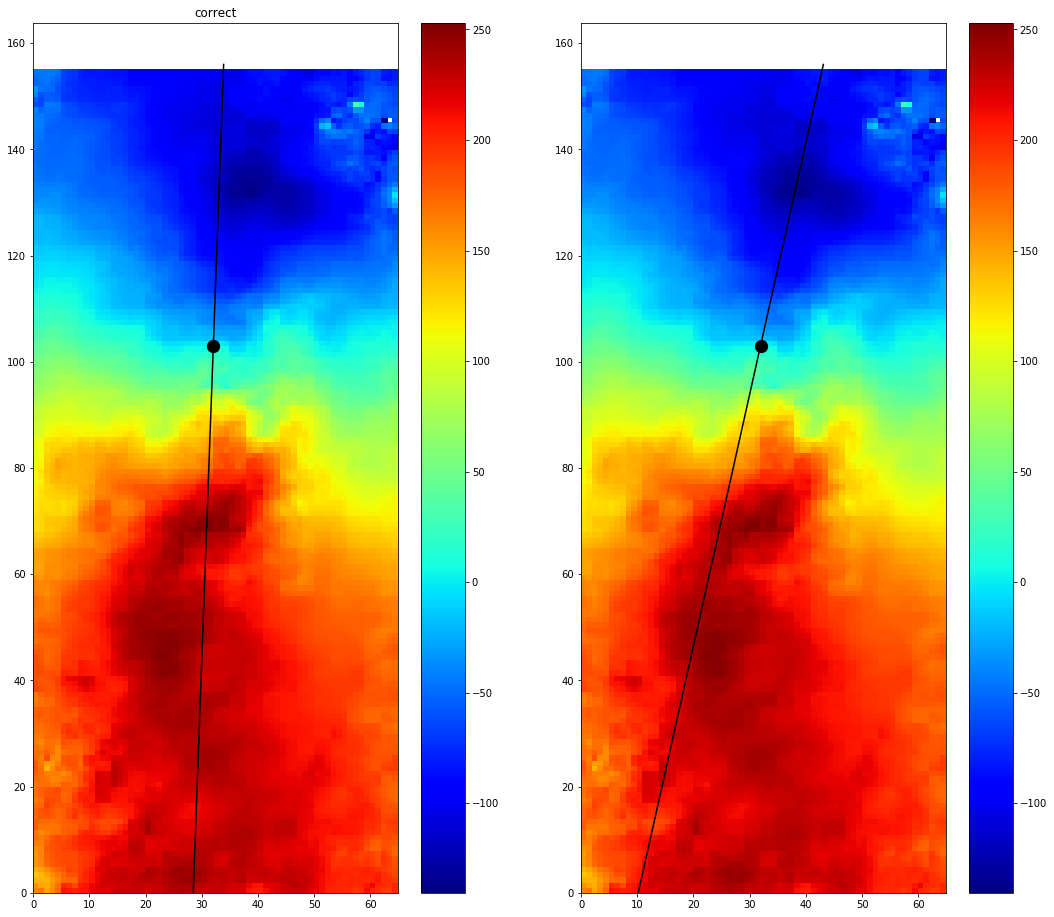

In [7]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([28.48,28.48 + 155. * np.tan(2.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

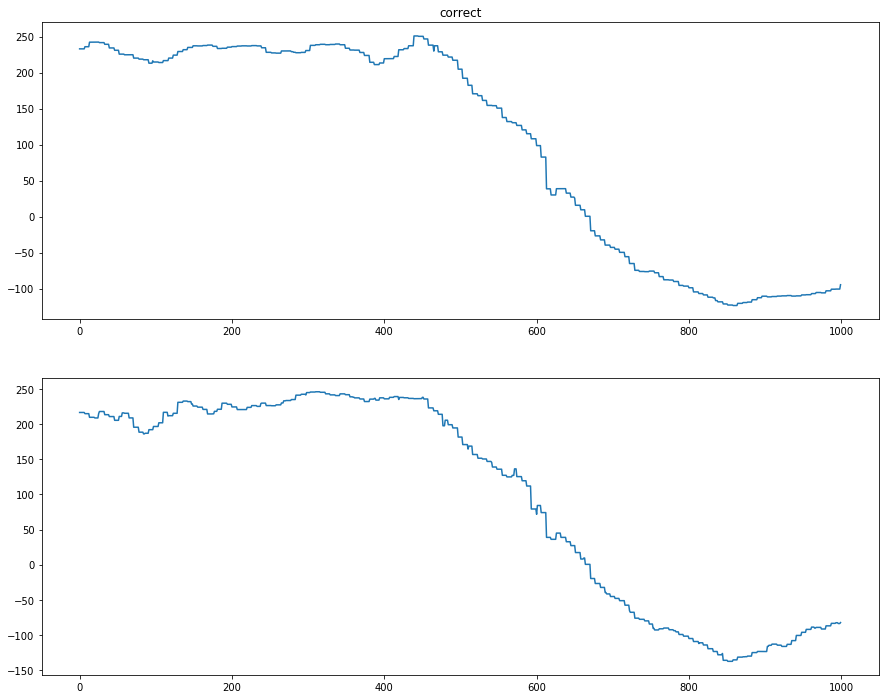

In [8]:
x0, y0 = 10.18, 0. 
x1, y1 = 10.18 + 155. * np.tan(12.*np.pi/180.),155.
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

x0_corr, y0_corr = 28.48, 0. 
x1_corr, y1_corr = 28.48 + 155. * np.tan(2.*np.pi/180.),155.
num = 1000
x_corr, y_corr = np.linspace(x0_corr, x1_corr, num), np.linspace(y0_corr, y1_corr, num)
zi_cub_corr = velocity_HI[y_corr.astype(np.int), x_corr.astype(np.int)]

fig = plt.figure(figsize = [15, 12])
plt.subplot(2,1,1)
line = plot(zi_cub_corr)
plt.title('correct')
plt.subplot(2,1,2)
line = plot(zi_cub)

In [9]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(12.*np.pi/180))**2)
r_vel_corr = np.sqrt(155.**2 + (155. * np.tan(2.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
r_vel_corr = r_vel_corr * 1.9
#Найдём центр галактики на срезе
c_r_vel = 103.00132757 / math.cos(12.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

c_r_vel_corr = 103.00132757 / math.cos(2.*np.pi/180.)
c_r_vel_corr = c_r_vel_corr * 1.9

In [12]:
vel_HI = sort(np.abs(zi_cub))
vel_HI_corr = sort(np.abs(zi_cub_corr))

r_HI = sort(np.abs(np.linspace(0., r_vel, 1000)-c_r_vel))
r_HI = r_HI * np.pi / (180 *3600) * Distance * 10**3 

r_HI_corr = sort(np.abs(np.linspace(0., r_vel_corr, 1000)-c_r_vel_corr))
r_HI_corr = r_HI_corr * np.pi / (180 *3600) * Distance * 10**3 

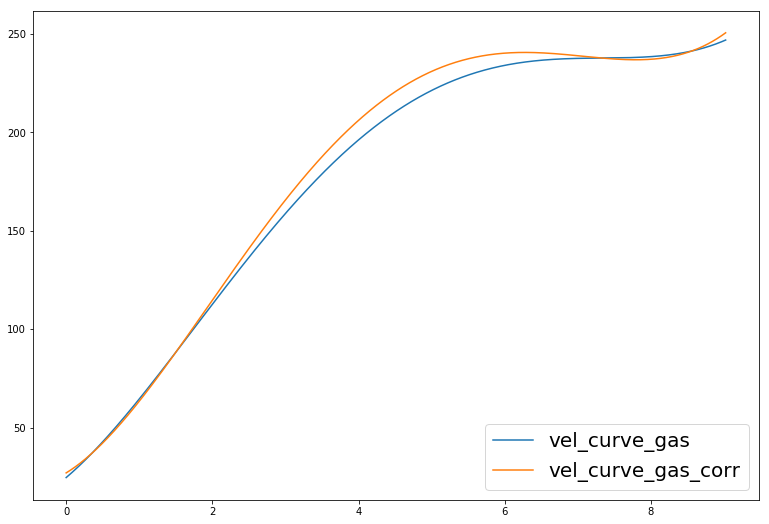

In [23]:
points = np.linspace(min(r_HI), max(r_HI), 1000)
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

points_corr = np.linspace(min(r_HI_corr), max(r_HI_corr), 1000)
velocity_approx_corr = poly1d(polyfit(r_HI_corr, vel_HI_corr, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points, velocity_approx(points), label='vel_curve_gas')
line2 = ax.plot(points, velocity_approx_corr(points_corr), label='vel_curve_gas_corr')
plt.legend(loc='lower right',fontsize=20)

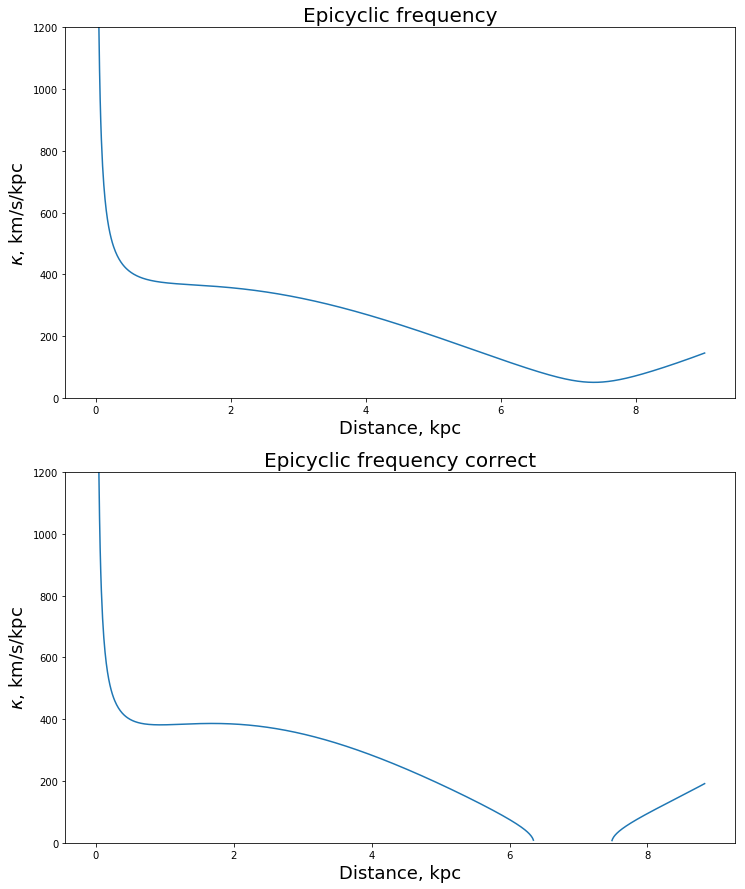

In [27]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
kappa = [functions.epic_freq(velocity_approx, r, dR) for r in points]
kappa_corr = [functions.epic_freq(velocity_approx_corr, r, dR) for r in points_corr]

fig = plt.figure(figsize = [12,15])
plt.subplot(2,1,1)
plt.plot(points, kappa) 
plt.title('Epicyclic frequency',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show

plt.subplot(2,1,2)
plt.plot(points_corr, kappa_corr) 
plt.title('Epicyclic frequency correct',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()

Соответственно у меня и в при подсчёте параметра Тумре получаюся не очень хорошие карты, причём это проблема не исчезает, если я меняю степень интерполяции.